### 0. 데이터 다운로드 
캘리포니아의 블록 그룹마다 인구, 중간소득, 중간 주택가격 등을 담고 있음.  
블록 그룹은 미국 인구조사국에서 샘플 데이터를 발표하는데 사용하는 최소한의 지리적 단위  

In [36]:
# 데이터 추출 함수
import os
import tarfile
from six.moves import urllib
import seaborn as sns
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})
import pandas as pd
import numpy as np

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [14]:
# 함수를 호출하면 작업공간에 datasets/housing 디렉터리를 만들고 housing.tgz 파일을 내려받고 
# 같은 디렉터리에 압축을 풀어 housing.csv 파일을 만듭니다.
fetch_housing_data()

In [15]:
# 데이터를 읽어 들이는 간단한 함수
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

### 1. 데이터 구조 훑어보기
각 행은 하나의 구역을 나타냄. 

In [16]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
# 데이터에 대한 간략한 설명과 특히 전체 행 수, 각 특성의 데이터 타입과 널이 아닌 값의 개수 확인
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
# 범주형 데이터로 각 카테고리마다 얼마나 많은 구역이 있는지 확인
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [22]:
# describe(): 숫자형 특성의 요약정보를 보여줌
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


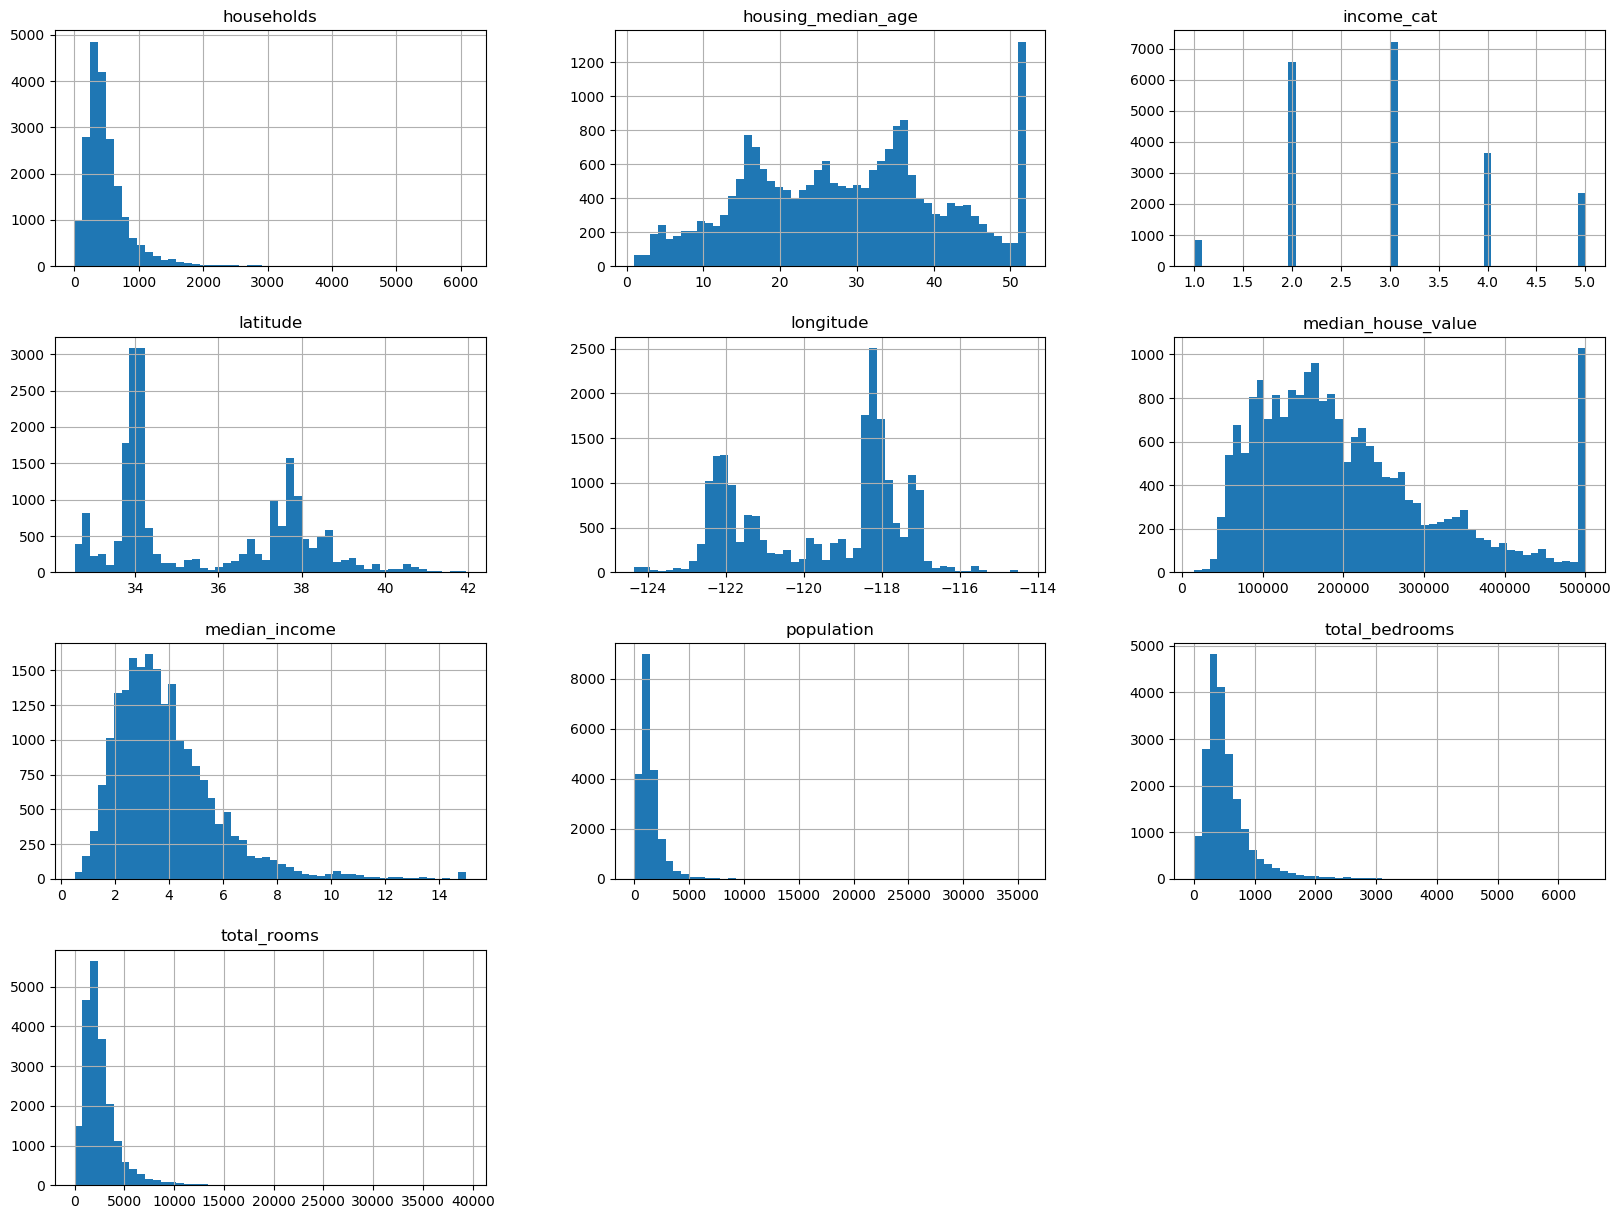

In [68]:
# 각 숫자형 특성을 히스토그램으로 그려보는 것.
# 히스토그램은 주어진 값의 범위에 속한 샘플 수를 나타냄
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use(["default"])
housing.hist(bins=50, figsize=(20,15))
plt.show()

#### 히스토그램을 통해 알 수 있는 정보
- 히스토그램을 통해 중간 소득(median income) 특성이 US 달러로 표현되어 있지 않은 것 같음
- 중간 주택 연도(housing median age)와 중간 주택 가격(median house value) 최댓값과 최소값을 한정
- 특성들의 스케일이 서로 많이 다름
- 많은 히스토그램의 꼬리가 두꺼움. 이를 좀 더 종 모양의 분포가 되도록 변형 <br><br>

CAUTION_데이터를 더 깊게 들여다보기 전에 테스트 세트를 따로 떼어놓아야 합니다. 그리고 테스트 세트를 절대 들여다보면 안됩니다.

### 2. 테스트 세트 만들기

In [26]:
# 테스트 세트 생성 함수 정의 
# 여러 번 계속하면 머신러닝 알고리즘이 전체 데이터셋을 보는 셈
# 해결책은 처음 실행에서 테스트 세트를 저장하고 다음번 실행에서 이를 불러들이는 것
# 또는 항상 같은 난수 인덱스가 생성되도록 np.random.permutation을 실행하기 전에 난수 발생기의 초기값 지정
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) #순서를 임의로 바꾸는 임의의 순열 반환
    test_set_size=int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [27]:
train_set,test_set=split_train_test(housing,0.2)
print(len(train_set),"train +", len(test_set),"test")

16512 train + 4128 test


In [28]:
# 위에 코드는 업데이트된 데이터셋을 사용하려면 문제 발생
# 일반적인 해결책으로 샘플의 식별자를 사용하여 테스트 세트로 보낼지 말지 정하는 것
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 **32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [29]:
# 주택 데이터셋에는 식별자가 없어 행의 인덱스를 ID로 사용
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [30]:
# 행의 인덱스를 고유 식별자로 사용할 때 새 데이터는 데이터셋의 끝에 추가되어야 함
# 이것이 불가능할 땐 고유 식별자를 만드는 데 안저한 특성을 사용
# 이 데이터는 구역의 위도와 경도를 활용
housing_with_id['id']=housing['longitude']*1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [31]:
# 데이터셋을 여러 서브셋으로 나누는 다양한 방법
# train_test_split는 위에 만든 split_train_test와 아주 비슷하지만 두가징 특징이 더 있음
# 1. 난수 초기값을 지정할 수 있는 radom_state 매개변수가 있고
# 2. 둘째 행의 개수가 같은 여러 개의 데이터셋을 넘겨서 같은 인덱스를 기반으로 나눌 수 있음
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [34]:
# 계층적 샘플링 
# 전체 모수는 계층이라는 동질의 그룹으로 나뉘고, 테스트 세트가 전체 모수를 대표하도록 각 계층에서 올바른 수의 샘플 추출
# 중간 소득이 중간 주택 가격을 예측하는데 매우 중요하다면, 중간 소득이 연속적인 숫자형 특성이므로
# 소득에 대한 카테고리 특성으로 만드는 코드
housing["income_cat"]=np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)
#pandas.where(조건문, 변경할 값) : inplace=True로 해주면 조건문에서 false에 해당되는 부분의 값을 변경해줌

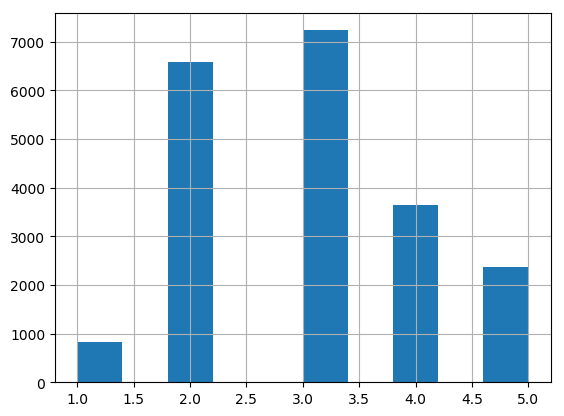

In [69]:
# 소득 카테고리의 히스토그램
housing["income_cat"].hist()

In [110]:
# 소득 카테고리를 기반으로 계층 샘플링
# 사이킷런의 Stratified shuffleSplit 사용
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [103]:
# 샘플링이 잘 되었는지 확인하고자 전체 주택 데이터셋에서 소득 카테고리의 비율 계산
housing["income_cat"].value_counts() / len(housing)

# train data 소득 카테고리의 비율 계산
start_train_set["income_cat"].value_counts() / len(start_train_set)

# test data 소득 카테고리의 비율 계산
start_test_set["income_cat"].value_counts() / len(start_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [111]:
# 계층 샘플링과 순수한 무작위 샘플링 편향 비교
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall":income_cat_proportions(housing),
    "Stratified" : income_cat_proportions(start_test_set),
    "Random":income_cat_proportions(test_set)
}).sort_index()
compare_props["Rand.%error"]=100 * compare_props["Random"] / compare_props["Overall"] -100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Rand.%error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [112]:
# income_cat 특성을 삭제해서 데이터를 원래 상태로 되돌림
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### 데이터 이해를 위한 탐색과 시각화

In [113]:
housing = strat_train_set.copy()

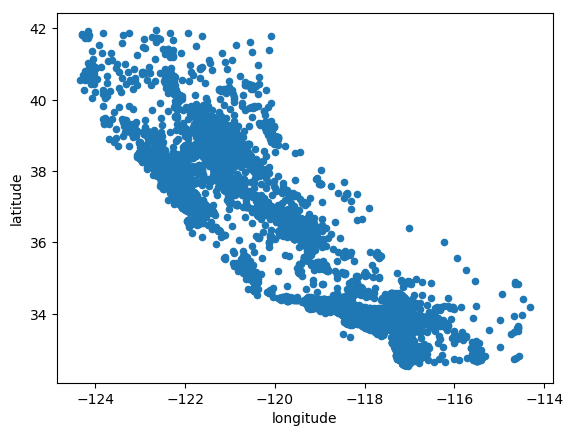

In [116]:
housing.plot(kind="scatter", x="longitude", y="latitude")

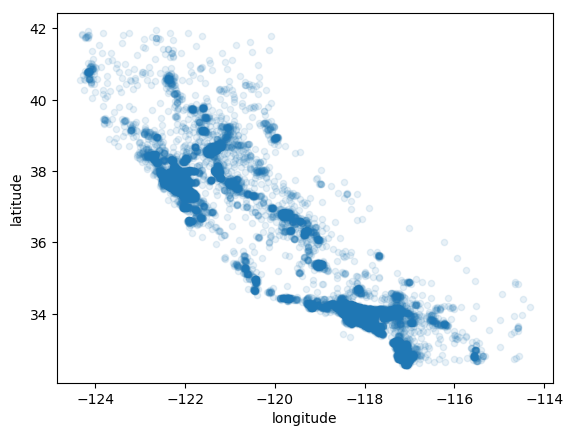

In [117]:
# 데이터 포인트가 밀집된 영역을 확인하기 위해 alpha 옵션 추가
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

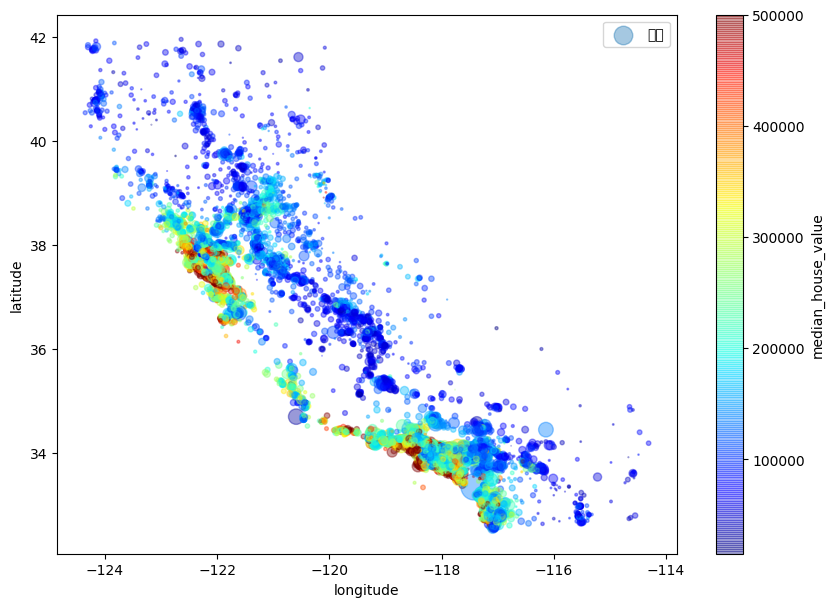

In [122]:
 # 주택가격 산점도 
# 원의 반지름은 구역의 인구(매개변수 s), 색깔은 가격(매개변수 c)
# 파란색(낮은 가격)에서 빨간색(높은 가격)까지 범위를 가지는 jet 사용
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="인구", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

위의 그림을 통해 주택 가격은 지역과 인구밀도에 관련이 매우 크다는 사실을 알 수 있음.  
이런 내용은 군집 알고리즘을 사용해 주요 군집을 찾고 군집의 중심까지의 거리를 재는 특성을 추가할때 도움이 됨.  

In [128]:
# 상관관계 조사
# 모든 특성 간의 표준 상관계수(피어슨의 r)
# 상관관계의 범위는 -1부터 1까지, 1에 가까우면 강한 양의 상관관계
# -1에 가까우면 강한 음의 상관관계 
# 0에 가까우면 선형적인 상관관계까 없다는 뜻
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B72B6C8DD8>,
      dtype=object)

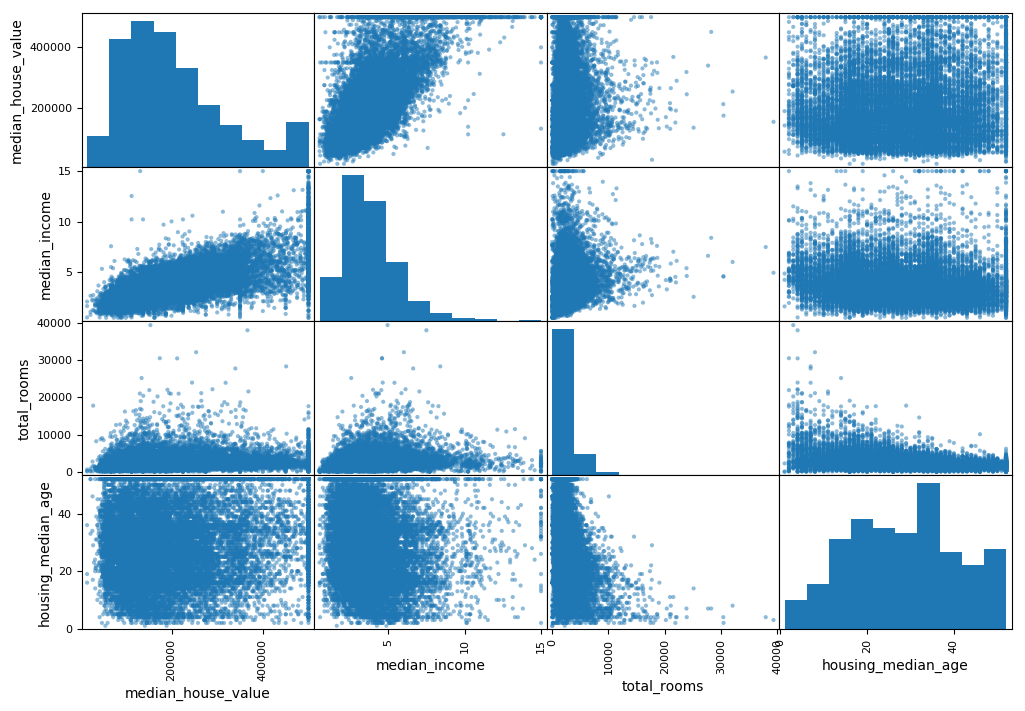

In [132]:
# 특성 사이의 상관관계를 확인하는 방법 : 숫자형 특성 사이에 산점도를 그려주는 판다스의 
# scatter_matrix 함수 사용
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

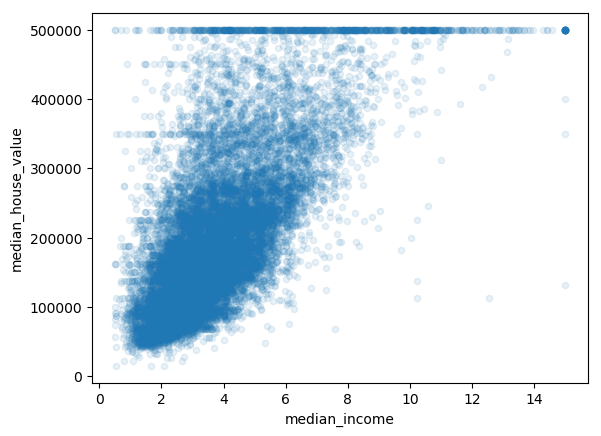

In [133]:
# 중간 주택 가격(median_house_value)를 예측하는 데 가장 유용할 것 같은 특성인 
# 중간 소득(median_income)의 상관관계 산점도 확대
housing.plot(kind="scatter", x="median_income",y="median_house_value",alpha=0.1)

위의 그래프를 보고 몇 가지 사실을 보여줌.  
1. 상관관계가 매우 강함. 위쪽으로 향하는 경향을 볼 수 있으며 포인트들이 너무 널리 퍼져 있지 않음
2. 앞서 본 가격 제한 값이 $500,000에서 수평선으로 잘 보임.
$450,000 근처에 수평선이 보이고 $350,000와 $280,000에도 있고 그 아래 조금 더 보임.    
알고리즘이 데이터에서 이런 이상한 형태를 학습하지 않도록 해당 구역을 제거하는 것이 좋음   

In [138]:
# 특성 조합으로 실험
# 머신러닝 알고리즘용 데이터를 실제로 준비하기 전에 여러 특성의 조합을 시도해보는 것이 좋음
# 가구당 방 개수와 가구당 인원 조합
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_household"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [139]:
cor_matrix=housing.corr()
cor_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_household     -0.259984
Name: median_house_value, dtype: float64